# **Logistic Regression Implementations: From Scratch and Using Library**

## **Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

## **1. Loading Data**

In [2]:
# Reading data from exams.csv file
df = pd.read_csv("exams.csv") 

In [3]:
# Function to normalize (scale) data using Min-Max normalization
def scale_dataset(dataframe):
    features = dataframe.iloc[:, :2]
    X = features.values
    y = dataframe.iloc[:, 2].values

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    
    # Stack data horizontally
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data

In [4]:
# Calling fucntion for scaling (normalizing) the dataset
scaled_data = scale_dataset(df)

## **2. Visualization**

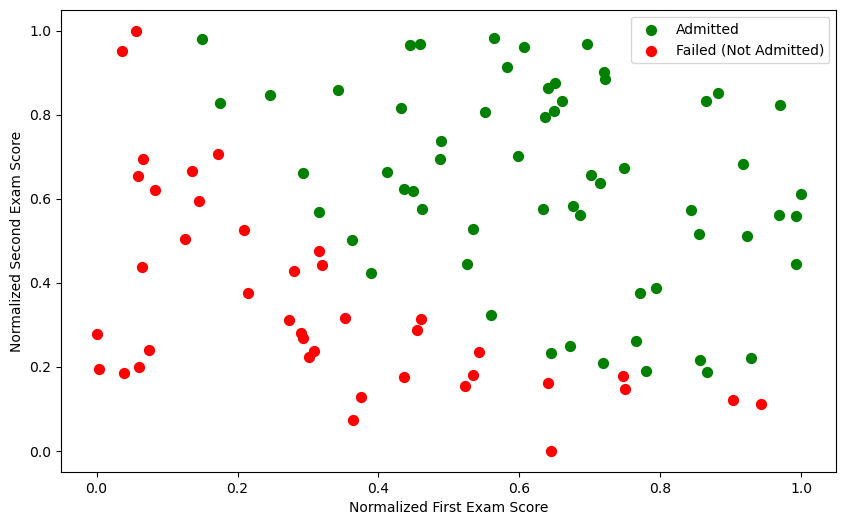

In [5]:
# Filtering out the admitted and failed students using boolean indexing
admitted = scaled_data[scaled_data[:, 2] == 1]
failed = scaled_data[scaled_data[:, 2] == 0]

# Plotting the points
plt.figure(figsize=(10,6))
plt.scatter(admitted[:, 0], admitted[:, 1], s=50, color='green', marker='o', label='Admitted')
plt.scatter(failed[:, 0], failed[:, 1], s=50, color='red', marker='o', label='Failed (Not Admitted)')

# Labeling the axes
plt.xlabel('Normalized First Exam Score')
plt.ylabel('Normalized Second Exam Score')

# Adding the legend
plt.legend()

# Showing the plot
plt.show()


## **3. Implementation of Logistic Regression from Scratch**

### **a) Sigmoid Function**

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### **b) Cost Function**

In [7]:
def cost_function(X, y, weights):
    m = y.shape[0] # len(y)
    h = sigmoid(X @ weights)
    cost = -np.sum(y * np.log(np.maximum(h, 1e-15)) + (1 - y) * np.log(np.maximum(1 - h, 1e-15))) / m # Using np.maximum to avoid log(0)
    return cost

### **c) Best Fit Parameters for Logistic Regression Using Gradient Descent from Scratch**

In [8]:
# Gradient Descent Function
def gradient_descent(X, y, weights, alpha, num_iterations):
    m = y.shape[0]
    cost_history = []
    for i in range(num_iterations):
        predictions = sigmoid(X.dot(weights))
        error = predictions - y
        gradient = X.T.dot(error) / m
        weights -= alpha * gradient
        cost_history.append(cost_function(X, y, weights))
    return weights, cost_history

# Logistic Regression Function
def logistic_regression(X, y, alpha, num_iterations):
    # Adding intercept term to X
    intercept = np.ones((X.shape[0], 1)) 
    X_with_intercept = np.hstack((intercept, X))
    
    # Initializing weights (thetas)
    weights = np.zeros(X_with_intercept.shape[1]) 
    
    # Running gradient descent function
    weights, cost_history = gradient_descent(X_with_intercept, y, weights, alpha, num_iterations) 
    
    return weights, cost_history

In [9]:
X = scaled_data[:, :-1]
y = scaled_data[:, -1]

alpha = 0.01  # Learning rate
num_iterations = 100000  # Number of iterations for the gradient descent

weights, cost_history = logistic_regression(X, y, alpha, num_iterations)

### **d) Graph of the Cost Function over Iterations**

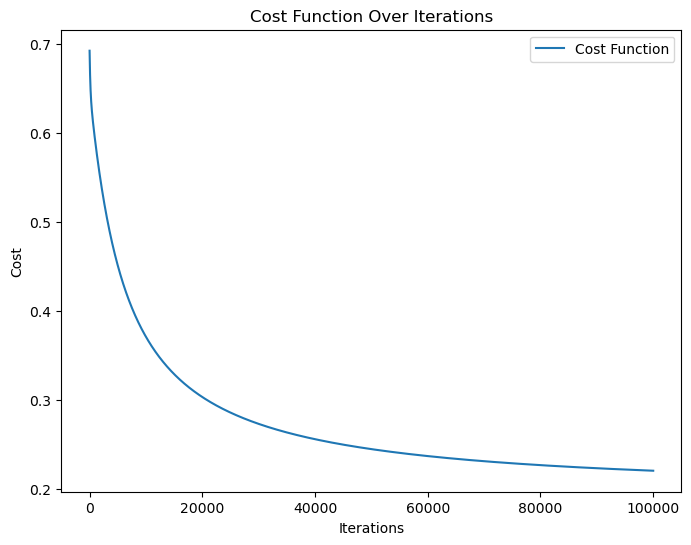

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(cost_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.legend()
plt.show()


### **e) Exam 1 Score vs Exam 2 Score and Decision Boundary**

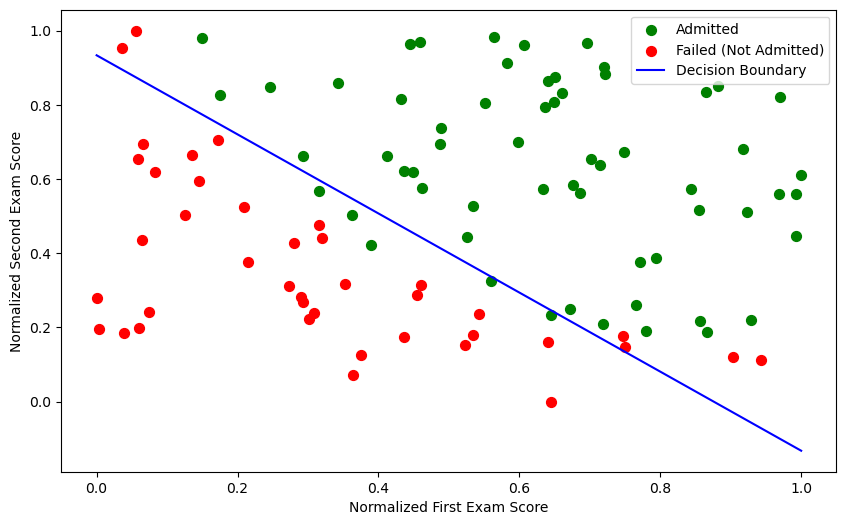

In [11]:
# Plotting the points
plt.figure(figsize=(10,6))
plt.scatter(admitted[:, 0], admitted[:, 1], s=50, color='green', marker='o', label='Admitted')
plt.scatter(failed[:, 0], failed[:, 1], s=50, color='red', marker='o', label='Failed (Not Admitted)')
    
# Labeling the axes
plt.xlabel('Normalized First Exam Score')
plt.ylabel('Normalized Second Exam Score')

# Defining the range of x_values using the Min and Max of the exam score (feature)
x_values = [scaled_data[:, 0].min(), scaled_data[:, 0].max()]

# Solving for y_values based on the x_values chosen
y_values = (-1 / weights[2]) * (weights[0] + np.dot(weights[1], x_values))

# Plotting 
plt.plot(x_values, y_values, label='Decision Boundary', color='blue')

# Adding the legend
plt.legend()

# Showing the plot
plt.show()

### **f) Making Predictions and Calculating ```accuracy_score```**

In [12]:
def make_predictions(X, weights):
    # Adding intercept term
    X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Computing the predicted probabilities
    predicted_probabilities = sigmoid(np.dot(X_with_intercept, weights))
    
    # Converting probabilities to 0 or 1 using 0.5 as the cutoff
    return (predicted_probabilities >= 0.5).astype(int)

X_train = scaled_data[:, :-1] # Feature matrix
y_train = scaled_data[:, -1] # Labels for training

# Predicting on the training data
y_train_predicted = make_predictions(X_train, weights)

# Calculating the accuracy on the training data
accuracy_manual = accuracy_score(y_train, y_train_predicted)

print("From Scratch Implementation")
print(f"Accuracy Score on the Training Set: {accuracy_manual}")


# Making predictions on the new data points
new_data = np.array([[55, 70, 1], [40, 60, 0]])

# Extracting only feature columns (exam scores)
exam_scores = new_data[:, :2]

# Applying normalization to the new data points
scaler = MinMaxScaler()
new_data_scaled = scaler.fit_transform(exam_scores)

new_predictions_manual = make_predictions(new_data_scaled, weights)

print(f"Predictions for the New Data Points: {new_predictions_manual}")


From Scratch Implementation
Accuracy Score on the Training Set: 0.89
Predictions for the New Data Points: [1 0]


## **4. Logistic Regression using library**

In [13]:
# Importing Required Library
from sklearn.linear_model import LogisticRegression

In [14]:
# Initializing the logistic regression model
log_reg = LogisticRegression()

# Fitting the logistic regression model on the training data
log_reg.fit(X_train, y_train)

# Predicting on the training data
y_train_predicted = log_reg.predict(X_train)

# Calculating the accuracy on the training data
accuracy_library = accuracy_score(y_train, y_train_predicted)

print("With Library Implementation")
print(f"Accuracy Score on the Training Set: {accuracy_library}")

# Making predictions on the new data points
new_predictions_library = log_reg.predict(new_data_scaled)
new_predictions_library_int = new_predictions_library.astype(int)

print(f"Predictions for the New Data Points: {new_predictions_library_int}")


With Library Implementation
Accuracy Score on the Training Set: 0.93
Predictions for the New Data Points: [1 0]


## **Conclusion**

In [15]:
# Converting data points to DataFrame for nicer display
df = pd.DataFrame(new_data, columns=['Exam 1 Score', 'Exam 2 Score', 'Admitted'])

# Adding predictions to the DataFrame
df['Manual Prediction'] = new_predictions_manual
df['Library Prediction'] = new_predictions_library_int

# Displaying the DataFrame
print(df)


   Exam 1 Score  Exam 2 Score  Admitted  Manual Prediction  Library Prediction
0            55            70         1                  1                   1
1            40            60         0                  0                   0
